# Classification using neural networks

*1*

In [1]:
import random
random.seed(1234)

*2*

In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
#converting the data to a 2D tensor
x_train = x_train.reshape([60000, 28*28]).astype('float32')/255
x_test = x_test.reshape([10000, 28*28]).astype('float32')/255

In [25]:
from keras.utils import to_categorical

In [26]:
#change individual values between 0 and 1
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.16666, random_state=1234)

*3*

In [29]:
from keras import models
from keras import layers
import tensorflow as tf

*i. Initial test*

In [30]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result = network.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.8421 - acc: 0.6953 - val_loss: 0.5397 - val_acc: 0.8071
Epoch 2/200
50000/50000 [==============================] - 3s 58us/step - loss: 0.5136 - acc: 0.8103 - val_loss: 0.5085 - val_acc: 0.8170
Epoch 3/200
50000/50000 [==============================] - 3s 58us/step - loss: 0.4292 - acc: 0.8408 - val_loss: 0.4064 - val_acc: 0.8469
Epoch 4/200
50000/50000 [==============================] - 3s 58us/step - loss: 0.3873 - acc: 0.8546 - val_loss: 0.4216 - val_acc: 0.8415
Epoch 5/200
50000/50000 [==============================] - 3s 59us/step - loss: 0.3543 - acc: 0.8674 - val_loss: 0.4369 - val_acc: 0.8424
Epoch 6/200
50000/50000 [==============================] - 3s 58us/step - loss: 0.3290 - acc: 0.8754 - val_loss: 0.3605 - val_acc: 0.8715
Epoch 7/200
50000/50000 [==============================] - 3s 60us/step - loss: 0.3125 - acc: 0.8839 - val_loss: 0.3281 - 

Epoch 118/200
50000/50000 [==============================] - 3s 64us/step - loss: 0.0873 - acc: 0.9754 - val_loss: 0.7091 - val_acc: 0.8940
Epoch 119/200
50000/50000 [==============================] - 3s 64us/step - loss: 0.0814 - acc: 0.9770 - val_loss: 0.7024 - val_acc: 0.8955
Epoch 120/200
50000/50000 [==============================] - 3s 67us/step - loss: 0.0758 - acc: 0.9772 - val_loss: 0.6689 - val_acc: 0.8978
Epoch 121/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0790 - acc: 0.9782 - val_loss: 0.6673 - val_acc: 0.8920
Epoch 122/200
50000/50000 [==============================] - 3s 66us/step - loss: 0.0764 - acc: 0.9765 - val_loss: 0.6169 - val_acc: 0.8981
Epoch 123/200
50000/50000 [==============================] - 4s 73us/step - loss: 0.0724 - acc: 0.9783 - val_loss: 0.7254 - val_acc: 0.8983
Epoch 124/200
50000/50000 [==============================] - 4s 74us/step - loss: 0.0853 - acc: 0.9762 - val_loss: 0.7719 - val_acc: 0.9009
Epoch 125/200
50000/

In [31]:
import matplotlib.pyplot as plt

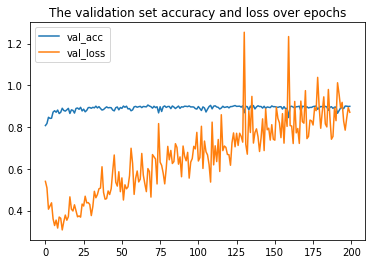

In [32]:
val_acc = result.history['val_acc']
val_loss = result.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.legend(['val_acc', 'val_loss'])
plt.title('The validation set accuracy and loss over epochs')
plt.show()

From above plot we can see that the validation set accuracy remains the same over the epochs while the loss grows larger over the epochs. It suggests that the model performs worse along the epochs based on the validation dataset.

*ii*

In [34]:
network_dropout = models.Sequential()
network_dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10, activation='softmax'))
network_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_dropout = network_dropout.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 4s 89us/step - loss: 0.9804 - acc: 0.6346 - val_loss: 0.7008 - val_acc: 0.7323
Epoch 2/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.5922 - acc: 0.7839 - val_loss: 0.5016 - val_acc: 0.8228
Epoch 3/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.5146 - acc: 0.8160 - val_loss: 0.5061 - val_acc: 0.7995
Epoch 4/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.4809 - acc: 0.8292 - val_loss: 0.4314 - val_acc: 0.8432
Epoch 5/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.4517 - acc: 0.8409 - val_loss: 0.4032 - val_acc: 0.8518
Epoch 6/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.4278 - acc: 0.8477 - val_loss: 0.4280 - val_acc: 0.8377
Epoch 7/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.4255 - acc: 0.8506 - val_loss: 0.3844 - 

Epoch 118/200
50000/50000 [==============================] - 4s 77us/step - loss: 0.3118 - acc: 0.9089 - val_loss: 0.3792 - val_acc: 0.8839
Epoch 119/200
50000/50000 [==============================] - 4s 77us/step - loss: 0.3149 - acc: 0.9090 - val_loss: 0.3661 - val_acc: 0.8917
Epoch 120/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.3054 - acc: 0.9092 - val_loss: 0.3878 - val_acc: 0.8905
Epoch 121/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.3083 - acc: 0.9125 - val_loss: 0.3687 - val_acc: 0.8952
Epoch 122/200
50000/50000 [==============================] - 4s 77us/step - loss: 0.3099 - acc: 0.9096 - val_loss: 0.3881 - val_acc: 0.8942
Epoch 123/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.3068 - acc: 0.9116 - val_loss: 0.3529 - val_acc: 0.8940
Epoch 124/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.3036 - acc: 0.9114 - val_loss: 0.3775 - val_acc: 0.8935
Epoch 125/200
50000/

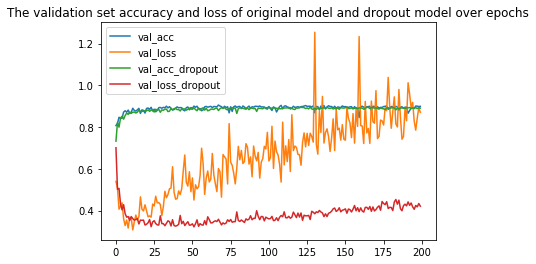

In [35]:
val_acc = result.history['val_acc']
val_loss = result.history['val_loss']
val_acc_dropout = result_dropout.history['val_acc']
val_loss_dropout = result_dropout.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.plot(val_acc_dropout)
plt.plot(val_loss_dropout)
plt.legend(['val_acc', 'val_loss', 'val_acc_dropout', 'val_loss_dropout'])
plt.title('The validation set accuracy and loss of original model and dropout model over epochs')
plt.show()

Comparing to the first model, the second model is much better with lower validity loss, but the validity accuracy are similar between the two models. Overall, the dropout model performs better than the initial model.

*iii. Weight regularization*

In [37]:
from keras import regularizers

In [39]:
network_L1 = models.Sequential()
network_L1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_L1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_L1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_L1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_L1.add(layers.Dense(10, activation='softmax'))
network_L1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_L1 = network_L1.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 4s 83us/step - loss: 14.7979 - acc: 0.5434 - val_loss: 4.2985 - val_acc: 0.6044
Epoch 2/200
50000/50000 [==============================] - 4s 70us/step - loss: 3.0904 - acc: 0.6505 - val_loss: 2.4417 - val_acc: 0.7040
Epoch 3/200
50000/50000 [==============================] - 3s 70us/step - loss: 2.2152 - acc: 0.6997 - val_loss: 1.9966 - val_acc: 0.7161
Epoch 4/200
50000/50000 [==============================] - 4s 70us/step - loss: 1.9088 - acc: 0.7312 - val_loss: 1.8117 - val_acc: 0.7469
Epoch 5/200
50000/50000 [==============================] - 4s 71us/step - loss: 1.7697 - acc: 0.7483 - val_loss: 1.7783 - val_acc: 0.7371
Epoch 6/200
50000/50000 [==============================] - 4s 71us/step - loss: 1.6712 - acc: 0.7648 - val_loss: 1.6907 - val_acc: 0.7518
Epoch 7/200
50000/50000 [==============================] - 4s 71us/step - loss: 1.6019 - acc: 0.7724 - val_loss: 1.5473 -

Epoch 118/200
50000/50000 [==============================] - 4s 71us/step - loss: 1.1717 - acc: 0.8450 - val_loss: 1.1829 - val_acc: 0.8408
Epoch 119/200
50000/50000 [==============================] - 4s 71us/step - loss: 1.1712 - acc: 0.8445 - val_loss: 1.2032 - val_acc: 0.8338
Epoch 120/200
50000/50000 [==============================] - 4s 71us/step - loss: 1.1713 - acc: 0.8443 - val_loss: 1.2199 - val_acc: 0.8173
Epoch 121/200
50000/50000 [==============================] - 4s 71us/step - loss: 1.1712 - acc: 0.8447 - val_loss: 1.1874 - val_acc: 0.8365
Epoch 122/200
50000/50000 [==============================] - 4s 72us/step - loss: 1.1688 - acc: 0.8462 - val_loss: 1.1718 - val_acc: 0.8450
Epoch 123/200
50000/50000 [==============================] - 4s 71us/step - loss: 1.1691 - acc: 0.8450 - val_loss: 1.2652 - val_acc: 0.8047
Epoch 124/200
50000/50000 [==============================] - 4s 72us/step - loss: 1.1686 - acc: 0.8461 - val_loss: 1.2175 - val_acc: 0.8301
Epoch 125/200
50000/

In [40]:
network_L2 = models.Sequential()
network_L2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
network_L2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_L2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_L2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_L2.add(layers.Dense(10, activation='softmax'))
network_L2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_L2 = network_L2.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 92us/step - loss: 2.1615 - acc: 0.6706 - val_loss: 1.5568 - val_acc: 0.7385
Epoch 2/200
50000/50000 [==============================] - 4s 76us/step - loss: 1.1934 - acc: 0.7875 - val_loss: 1.1278 - val_acc: 0.7573
Epoch 3/200
50000/50000 [==============================] - 4s 76us/step - loss: 0.8948 - acc: 0.8105 - val_loss: 0.7886 - val_acc: 0.8299
Epoch 4/200
50000/50000 [==============================] - 4s 77us/step - loss: 0.7519 - acc: 0.8269 - val_loss: 0.6934 - val_acc: 0.8355
Epoch 5/200
50000/50000 [==============================] - 4s 76us/step - loss: 0.6734 - acc: 0.8348 - val_loss: 0.6324 - val_acc: 0.8384
Epoch 6/200
50000/50000 [==============================] - 4s 76us/step - loss: 0.6131 - acc: 0.8436 - val_loss: 0.6252 - val_acc: 0.8318
Epoch 7/200
50000/50000 [==============================] - 4s 79us/step - loss: 0.5846 - acc: 0.8455 - val_loss: 0.5404 - 

Epoch 118/200
50000/50000 [==============================] - 4s 79us/step - loss: 0.3315 - acc: 0.9138 - val_loss: 0.4702 - val_acc: 0.8608
Epoch 119/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.3302 - acc: 0.9122 - val_loss: 0.4383 - val_acc: 0.8763
Epoch 120/200
50000/50000 [==============================] - 4s 83us/step - loss: 0.3300 - acc: 0.9124 - val_loss: 0.4586 - val_acc: 0.8674
Epoch 121/200
50000/50000 [==============================] - 4s 83us/step - loss: 0.3285 - acc: 0.9133 - val_loss: 0.5282 - val_acc: 0.8491
Epoch 122/200
50000/50000 [==============================] - 4s 80us/step - loss: 0.3283 - acc: 0.9138 - val_loss: 0.4846 - val_acc: 0.8605
Epoch 123/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.3247 - acc: 0.9158 - val_loss: 0.4362 - val_acc: 0.8726
Epoch 124/200
50000/50000 [==============================] - 4s 83us/step - loss: 0.3279 - acc: 0.9133 - val_loss: 0.4744 - val_acc: 0.8658
Epoch 125/200
50000/

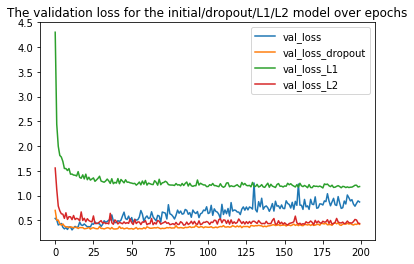

In [43]:
val_loss = result.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_L1 = result_L1.history['val_loss']
val_loss_L2 = result_L2.history['val_loss']
plt.plot(val_loss)
plt.plot(val_loss_dropout)
plt.plot(val_loss_L1)
plt.plot(val_loss_L2)
plt.legend(['val_loss', 'val_loss_dropout', 'val_loss_L1', 'val_loss_L2'])
plt.title('The validation loss for the initial/dropout/L1/L2 model over epochs')
plt.show()

From above plot we can see that, when epoch smaller than 150, the dropout model performs the best. When epoch larger than 150, the L2 model performs the best.

*iv.alternative models*

In [45]:
network_alt = models.Sequential()
network_alt.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_alt.add(layers.Dropout(0.5))
network_alt.add(layers.Dense(512, activation='relu'))
network_alt.add(layers.Dropout(0.5))
network_alt.add(layers.Dense(512, activation='relu'))
network_alt.add(layers.Dropout(0.5))
network_alt.add(layers.Dense(10, activation='softmax'))
network_alt.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_alt = network_alt.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.8610 - acc: 0.6833 - val_loss: 0.5987 - val_acc: 0.7883
Epoch 2/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.5533 - acc: 0.8001 - val_loss: 0.4537 - val_acc: 0.8397
Epoch 3/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.4889 - acc: 0.8226 - val_loss: 0.5044 - val_acc: 0.8234
Epoch 4/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.4503 - acc: 0.8380 - val_loss: 0.4084 - val_acc: 0.8407
Epoch 5/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.4261 - acc: 0.8462 - val_loss: 0.3855 - val_acc: 0.8589
Epoch 6/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.4095 - acc: 0.8524 - val_loss: 0.3637 - val_acc: 0.8665
Epoch 7/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.3912 - acc: 0.8596 - val_loss: 0.3788 - 

In [46]:
network_alt2 = models.Sequential()
network_alt2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_alt2.add(layers.Dropout(0.5))
network_alt2.add(layers.Dense(512, activation='relu'))
network_alt2.add(layers.Dropout(0.5))
network_alt2.add(layers.Dense(512, activation='relu'))
network_alt2.add(layers.Dropout(0.5))
network_alt2.add(layers.Dense(512, activation='relu'))
network_alt2.add(layers.Dropout(0.5))
network_alt2.add(layers.Dense(10, activation='softmax'))
network_alt2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_alt2 = network_alt2.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 98us/step - loss: 0.9831 - acc: 0.6319 - val_loss: 0.6382 - val_acc: 0.7858
Epoch 2/100
50000/50000 [==============================] - 4s 83us/step - loss: 0.5915 - acc: 0.7878 - val_loss: 0.5260 - val_acc: 0.8088
Epoch 3/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.5173 - acc: 0.8168 - val_loss: 0.4830 - val_acc: 0.8292
Epoch 4/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.4813 - acc: 0.8290 - val_loss: 0.4425 - val_acc: 0.8455
Epoch 5/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.4480 - acc: 0.8405 - val_loss: 0.4347 - val_acc: 0.8355
Epoch 6/100
50000/50000 [==============================] - 5s 105us/step - loss: 0.4264 - acc: 0.8471 - val_loss: 0.3704 - val_acc: 0.8636
Epoch 7/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.4122 - acc: 0.8539 - val_loss: 0.3726 -

In [47]:
network_alt3 = models.Sequential()
network_alt3.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_alt3.add(layers.Dropout(0.5))
network_alt3.add(layers.Dense(512, activation='relu'))
network_alt3.add(layers.Dropout(0.5))
network_alt3.add(layers.Dense(10, activation='softmax'))
network_alt3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_alt3 = network_alt3.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.7839 - acc: 0.7175 - val_loss: 0.5278 - val_acc: 0.8067
Epoch 2/100
50000/50000 [==============================] - 2s 44us/step - loss: 0.5185 - acc: 0.8118 - val_loss: 0.4424 - val_acc: 0.8365
Epoch 3/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.4560 - acc: 0.8330 - val_loss: 0.4238 - val_acc: 0.8463
Epoch 4/100
50000/50000 [==============================] - 2s 44us/step - loss: 0.4221 - acc: 0.8457 - val_loss: 0.3864 - val_acc: 0.8533
Epoch 5/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.3989 - acc: 0.8544 - val_loss: 0.4468 - val_acc: 0.8419
Epoch 6/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.3856 - acc: 0.8581 - val_loss: 0.3687 - val_acc: 0.8644
Epoch 7/100
50000/50000 [==============================] - 2s 44us/step - loss: 0.3689 - acc: 0.8660 - val_loss: 0.3614 - 

In [48]:
network_alt4 = models.Sequential()
network_alt4.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_alt4.add(layers.Dense(512, activation='relu'))
network_alt4.add(layers.Dense(512, activation='relu'))
network_alt4.add(layers.Dense(10, activation='softmax'))
network_alt4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_alt4 = network_alt4.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 72us/step - loss: 0.7921 - acc: 0.7097 - val_loss: 0.5288 - val_acc: 0.8124
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.4927 - acc: 0.8180 - val_loss: 0.4755 - val_acc: 0.8172
Epoch 3/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.4164 - acc: 0.8446 - val_loss: 0.4163 - val_acc: 0.8458
Epoch 4/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.3716 - acc: 0.8610 - val_loss: 0.3421 - val_acc: 0.8721
Epoch 5/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.3411 - acc: 0.8717 - val_loss: 0.4964 - val_acc: 0.8250
Epoch 6/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.3209 - acc: 0.8797 - val_loss: 0.4265 - val_acc: 0.8454
Epoch 7/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2995 - acc: 0.8872 - val_loss: 0.3312 - 

In [49]:
network_alt5 = models.Sequential()
network_alt5.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_alt5.add(layers.Dense(512, activation='relu'))
network_alt5.add(layers.Dense(10, activation='softmax'))
network_alt5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_alt5 = network_alt5.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 62us/step - loss: 0.7377 - acc: 0.7400 - val_loss: 0.6454 - val_acc: 0.7505
Epoch 2/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.4631 - acc: 0.8290 - val_loss: 0.4503 - val_acc: 0.8223
Epoch 3/100
50000/50000 [==============================] - 2s 39us/step - loss: 0.3993 - acc: 0.8532 - val_loss: 0.3957 - val_acc: 0.8526
Epoch 4/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.3571 - acc: 0.8674 - val_loss: 0.3406 - val_acc: 0.8738
Epoch 5/100
50000/50000 [==============================] - 2s 39us/step - loss: 0.3340 - acc: 0.8740 - val_loss: 0.3249 - val_acc: 0.8827
Epoch 6/100
50000/50000 [==============================] - 2s 39us/step - loss: 0.3085 - acc: 0.8844 - val_loss: 0.3683 - val_acc: 0.8654
Epoch 7/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.2908 - acc: 0.8912 - val_loss: 0.3294 - 

In [50]:
network_alt6 = models.Sequential()
network_alt6.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_alt6.add(layers.Dense(512, activation='relu'))
network_alt6.add(layers.Dense(512, activation='relu'))
network_alt6.add(layers.Dense(512, activation='relu'))
network_alt6.add(layers.Dense(512, activation='relu'))
network_alt6.add(layers.Dense(10, activation='softmax'))
network_alt6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_alt6 = network_alt6.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 98us/step - loss: 0.9660 - acc: 0.6454 - val_loss: 0.6053 - val_acc: 0.7635
Epoch 2/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.5421 - acc: 0.7992 - val_loss: 0.4717 - val_acc: 0.8296
Epoch 3/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.4618 - acc: 0.8280 - val_loss: 0.4045 - val_acc: 0.8457
Epoch 4/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.4123 - acc: 0.8482 - val_loss: 0.4243 - val_acc: 0.8412
Epoch 5/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.3852 - acc: 0.8608 - val_loss: 0.4745 - val_acc: 0.8256
Epoch 6/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.3471 - acc: 0.8707 - val_loss: 0.3925 - val_acc: 0.8625
Epoch 7/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.3285 - acc: 0.8781 - val_loss: 0.3538 - 

In [51]:
network_alt7 = models.Sequential()
network_alt7.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_alt7.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_alt7.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_alt7.add(layers.Dense(10, activation='softmax'))
network_alt7.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_alt7 = network_alt7.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 81us/step - loss: 12.0186 - acc: 0.6118 - val_loss: 3.7311 - val_acc: 0.6599
Epoch 2/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.6428 - acc: 0.6955 - val_loss: 2.0685 - val_acc: 0.7158
Epoch 3/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.8881 - acc: 0.7235 - val_loss: 1.8384 - val_acc: 0.6991
Epoch 4/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.6558 - acc: 0.7485 - val_loss: 1.5707 - val_acc: 0.7575
Epoch 5/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.5340 - acc: 0.7620 - val_loss: 1.5030 - val_acc: 0.7377
Epoch 6/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.4555 - acc: 0.7741 - val_loss: 1.4025 - val_acc: 0.7938
Epoch 7/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.4070 - acc: 0.7817 - val_loss: 1.3937 -

In [52]:
network_alt8 = models.Sequential()
network_alt8.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_alt8.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_alt8.add(layers.Dense(10, activation='softmax'))
network_alt8.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_alt8 = network_alt8.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 64us/step - loss: 9.0335 - acc: 0.6663 - val_loss: 3.0159 - val_acc: 0.7224
Epoch 2/100
50000/50000 [==============================] - 2s 41us/step - loss: 2.1934 - acc: 0.7398 - val_loss: 1.7388 - val_acc: 0.7602
Epoch 3/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.5122 - acc: 0.7680 - val_loss: 1.3885 - val_acc: 0.7602
Epoch 4/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.3061 - acc: 0.7834 - val_loss: 1.2594 - val_acc: 0.7678
Epoch 5/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.1944 - acc: 0.7952 - val_loss: 1.1667 - val_acc: 0.7936
Epoch 6/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.1315 - acc: 0.8003 - val_loss: 1.1209 - val_acc: 0.7984
Epoch 7/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.0929 - acc: 0.8088 - val_loss: 1.0855 - 

In [56]:
network_alt9 = models.Sequential()
network_alt9.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_alt9.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_alt9.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_alt9.add(layers.Dense(10, activation='softmax'))
network_alt9.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_alt9 = network_alt9.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 89us/step - loss: 6.4294 - acc: 0.6480 - val_loss: 2.8661 - val_acc: 0.7433
Epoch 2/100
50000/50000 [==============================] - 3s 64us/step - loss: 2.1524 - acc: 0.7352 - val_loss: 1.5748 - val_acc: 0.7750
Epoch 3/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.4806 - acc: 0.7615 - val_loss: 1.2067 - val_acc: 0.7951
Epoch 4/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.2112 - acc: 0.7848 - val_loss: 1.0859 - val_acc: 0.7930
Epoch 5/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.0842 - acc: 0.7912 - val_loss: 1.0843 - val_acc: 0.7798
Epoch 6/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.9903 - acc: 0.8032 - val_loss: 0.9861 - val_acc: 0.7888
Epoch 7/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.9396 - acc: 0.8108 - val_loss: 0.9375 - 

In [54]:
network_alt10 = models.Sequential()
network_alt10.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_alt10.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_alt10.add(layers.Dense(10, activation='softmax'))
network_alt10.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_alt10 = network_alt10.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 68us/step - loss: 6.2714 - acc: 0.6804 - val_loss: 2.5318 - val_acc: 0.7850
Epoch 2/100
50000/50000 [==============================] - 2s 42us/step - loss: 2.0180 - acc: 0.7379 - val_loss: 1.5341 - val_acc: 0.7717
Epoch 3/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.3955 - acc: 0.7640 - val_loss: 1.2997 - val_acc: 0.7454
Epoch 4/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.1605 - acc: 0.7830 - val_loss: 1.1195 - val_acc: 0.7847
Epoch 5/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.0283 - acc: 0.7983 - val_loss: 1.0201 - val_acc: 0.7753
Epoch 6/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.9634 - acc: 0.8048 - val_loss: 0.9278 - val_acc: 0.8109
Epoch 7/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.9073 - acc: 0.8158 - val_loss: 0.9358 - 

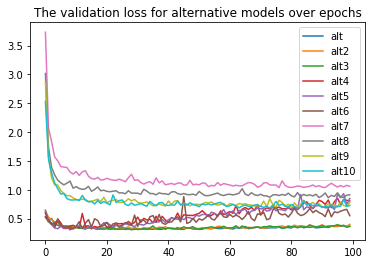

In [57]:
result_ls = [result_alt, result_alt2, result_alt3, result_alt4, result_alt5,\
             result_alt6, result_alt7, result_alt8, result_alt9, result_alt10]

for rs in result_ls:
    vl = rs.history['val_loss'][:100]
    plt.plot(vl)

plt.legend(['alt', 'alt2', 'alt3', 'alt4', 'alt5', 'alt6', 'alt7', 'alt8', 'alt9', 'alt10'])
plt.title('The validation loss for alternative models over epochs')
plt.show()

From above plot we can see that alternative model 3 (3-layer model with drop out) has the lowest validation loss and therefore performs the best.

*4. Final model*

In [65]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape([60000, 28*28]).astype('float32')/255
x_test = x_test.reshape([10000, 28*28]).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

best_model = network_alt3.fit(x_train, y_train, epochs=22, batch_size=512)

Epoch 1/22
60000/60000 [==============================] - 2s 40us/step - loss: 0.1980 - acc: 0.9323
Epoch 2/22
60000/60000 [==============================] - 2s 41us/step - loss: 0.1910 - acc: 0.9345
Epoch 3/22
60000/60000 [==============================] - 2s 40us/step - loss: 0.1936 - acc: 0.9325
Epoch 4/22
60000/60000 [==============================] - 2s 40us/step - loss: 0.1925 - acc: 0.9338
Epoch 5/22
60000/60000 [==============================] - 2s 40us/step - loss: 0.1954 - acc: 0.9347
Epoch 6/22
60000/60000 [==============================] - 2s 40us/step - loss: 0.1897 - acc: 0.9334
Epoch 7/22
60000/60000 [==============================] - 2s 40us/step - loss: 0.1877 - acc: 0.9340
Epoch 8/22
60000/60000 [==============================] - 2s 40us/step - loss: 0.1872 - acc: 0.9351
Epoch 9/22
60000/60000 [==============================] - 2s 40us/step - loss: 0.1895 - acc: 0.9350
Epoch 10/22
60000/60000 [==============================] - 2s 41us/step - loss: 0.1843 - acc: 0.9363

In [66]:
network_alt3.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 46us/step


[0.45949229189306495, 0.8962]

The test set loss and accuracy of the selected model are 0.4595 and 0.8962 respectively. Comparing to its validation set loss and accuracy of 0.3656 and 0.9008, the model generalizes well with only slightly lower accuracy. Comparing to other models, this model has less complexity with only three layers with dropout. As a result, this model is more suitable for this low-dimensional dattaset. Other more complicated complex models may lead to overfitting.